In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import os

In [7]:
from functools import partial

from IPython.core.display import HTML, display

from bokeh.plotting import figure, output_notebook, show

In [76]:
from scipy.sparse import coo_matrix, csr_matrix
import cPickle as pickle

In [25]:
def permute(adjacency_matrix, labels):
    n = adjacency_matrix.shape[0]

    adjacency_matrix = coo_matrix(adjacency_matrix)
    row = np.copy(adjacency_matrix.row)
    col = np.copy(adjacency_matrix.col)
    val = np.copy(adjacency_matrix.data)
    nnz = len(val)

    matrix = csr_matrix(coo_matrix((val, (row, col)), shape = (n, n)))
    mapping = []
    for label in set(labels):
        mapping.extend(list(np.where(labels==label)[0]))

    return csr_matrix(coo_matrix( (val, ([mapping[r] for r in row], [mapping[c] for c in col])), (n, n)))

In [10]:
import datashader as ds
from datashader.bokeh_ext import InteractiveImage
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from datashader import transfer_functions as tf
from datashader.colors import Greys9

In [16]:
Greys9_r   = list(reversed(Greys9))[:-2]
background = "white"
export = partial(export_image, export_path="export", background=background)
cm     = partial(colormap_select, reverse=(background=="white"))

x_range = df['x'].min(), df['x'].max()
y_range = df['y'].min(), df['y'].max()
plot_width  = 600
plot_height = 600

In [12]:
def base_plot(tools='pan,wheel_zoom,reset', 
              x_range=x_range, 
              y_range=y_range, 
              plot_width=plot_width, 
              plot_height=plot_height,
              **plot_args):
    
    p = figure(tools=tools,
               x_range=x_range, 
               y_range=y_range,               
               plot_width=plot_width, 
               plot_height=plot_height,
               outline_line_color=None,
               min_border=0, 
               min_border_left=0, 
               min_border_right=0,
               min_border_top=0, 
               min_border_bottom=0, 
               **plot_args)
    
    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p

In [ ]:
output_notebook()

In [58]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()

import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import Greys9
Greys9_r = list(reversed(Greys9))[:-2]

plot_width  = int(600)
plot_height = plot_width

Loading BokehJS ...

In [12]:
def base_plot(tools='pan,wheel_zoom,reset',plot_width=plot_width, plot_height=plot_height, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0, **plot_args)
    
    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p
    
options = dict(line_color=None, fill_color='blue', size=5)

Loading BokehJS ...

## Working with the 50M+ point dataset...

In [9]:
import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import Greys9
Greys9_r = list(reversed(Greys9))[:-2]

### ... single image over the full dataset

In [10]:
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
agg = cvs.points(df, 'x', 'y',  ds.count('z'))
img = tf.interpolate(agg, cmap=["white", 'darkblue'], how='log')

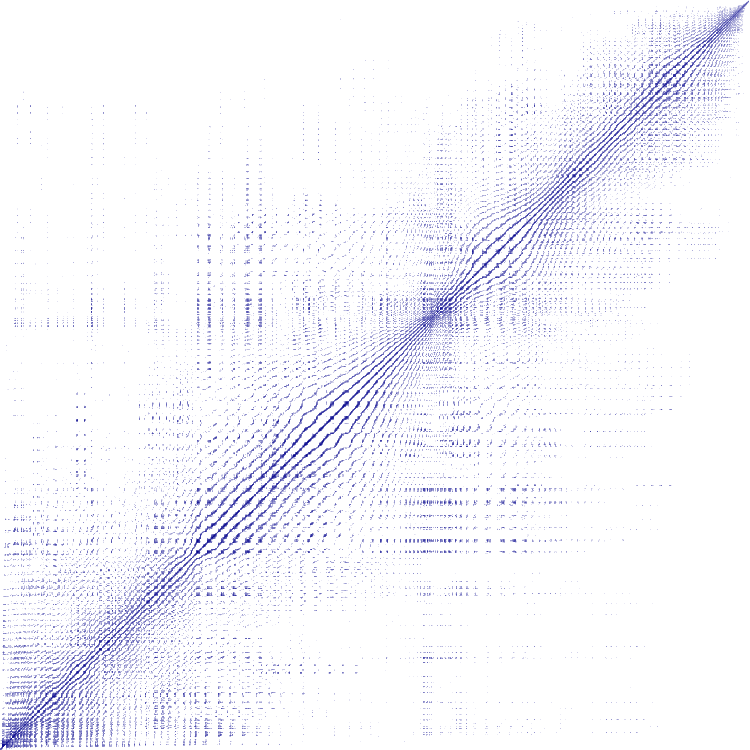

In [11]:
img


### ...interactive zooming capabilities over the full dataset

In [18]:
import datashader as ds
from datashader.bokeh_ext import InteractiveImage
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from IPython.core.display import HTML, display

background = "black"
export = partial(export_image, export_path="export", background=background)
cm = partial(colormap_select, reverse=(background=="black"))

def create_image(x_range, y_range, w=plot_width, h=plot_height):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(df, 'x', 'y',  ds.count('z'))
    img = tf.interpolate(agg, cmap=Hot, how='eq_hist')
    return tf.dynspread(img, threshold=0.5, max_px=4)

p = base_plot(background_fill_color=background)
export(create_image(x_range, y_range),"Adjacency")
InteractiveImage(p, create_image)